In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score,plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve, ClassificationReport

In [2]:
pwd

'/Users/andrewstephens/Final_project/Modeling'

In [3]:
cd ..

/Users/andrewstephens/Final_project


In [4]:
df = pd.read_csv('Data/Preprocessing.csv',index_col=0)
df.head()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y,job_admin.,job_blue-collar,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,1,999,0,93.994,-36.4,5191.0,no,0,0,...,0,1,0,0,0,0,1,0,1,0
1,57,1,999,0,93.994,-36.4,5191.0,no,0,0,...,0,1,0,0,0,0,1,0,1,0
2,37,1,999,0,93.994,-36.4,5191.0,no,0,0,...,0,1,0,0,0,0,1,0,1,0
3,40,1,999,0,93.994,-36.4,5191.0,no,1,0,...,0,1,0,0,0,0,1,0,1,0
4,56,1,999,0,93.994,-36.4,5191.0,no,0,0,...,0,1,0,0,0,0,1,0,1,0


In [5]:
X=df.drop(['y',"y_yes","y_no"], axis=1)
y=df['y']



# Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [7]:
X_train.shape, y_train.shape 

((32950, 60), (32950,))

In [8]:
X_train.columns

Index(['age', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
     

# Making Sure Data is Balanced 



Using the undersampling strategy 

In [9]:
# summarize class distribution
print("Before undersampling: ", Counter(y_train))
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train, y_train = undersample.fit_resample(X_train, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train))

Before undersampling:  Counter({'no': 29254, 'yes': 3696})
After undersampling:  Counter({'no': 3696, 'yes': 3696})


In [10]:
# Looks like our data is balanced

# Model Creation

We will be starting with KNN, a unsupervised learning method, because its versatile, simple, accurate and non assumpitve. Choosing K parameter will be most important, as it may cause overfitting if we are not careful. 

# KNN 

In [11]:
# pipeline combining transformers and estimator
pipe_knn= make_pipeline(StandardScaler(), KNeighborsClassifier())

In [12]:
# grid searh to choose the best (combination of) hyperparameters
gs_knn=GridSearchCV(estimator= pipe_knn,
               param_grid={'kneighborsclassifier__n_neighbors':[4,5,6,7]},
               scoring='accuracy',
               cv=5)


In [13]:



# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_knn_scores = cross_val_score(gs_knn, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)



In [14]:
# fit, and fit with best estimator
gs_knn.fit(X_train, y_train)
gs_knn_best=gs_knn.best_estimator_
gs_knn_best.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

In [15]:
print('Train Accuracy:   {0:.1f}%'.format(gs_knn.score(X_train, y_train)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_knn.score(X_test, y_test)*100))


Train Accuracy:   76.1%
Test Accuracy:    75.3%


In [36]:
#confusion_matrix and classification report
ypreds=gs_knn_best.predict(X_test)
print(classification_report(y_test,ypreds))



              precision    recall  f1-score   support

          no       0.94      0.77      0.85      7294
         yes       0.26      0.64      0.37       944

    accuracy                           0.75      8238
   macro avg       0.60      0.70      0.61      8238
weighted avg       0.86      0.75      0.79      8238



In [17]:
#confusion matrix 

Confusion matrix, without normalization
[[5598 1696]
 [ 340  604]]
Normalized confusion matrix
[[0.76748012 0.23251988]
 [0.36016949 0.63983051]]


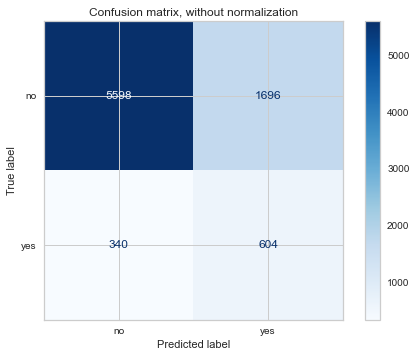

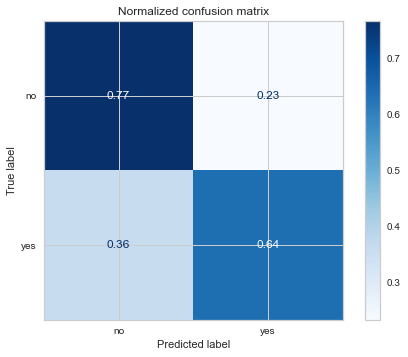

In [18]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gs_knn, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


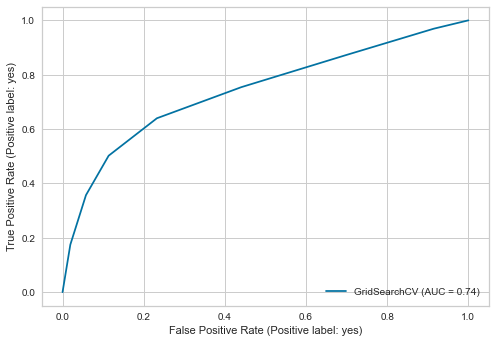

In [37]:
KNN_score = plot_roc_curve(gs_knn, X_test, y_test)

36% FP and 23%FN, AUC 74%

Looks really good ! Now lets try Logistic Regression. 

# Logistic Regression 

In [19]:
lr = LogisticRegressionCV(random_state=1, max_iter =1000)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [20]:
test_accuracy = accuracy_score(y_test,preds)
print(test_accuracy)

0.842680262199563


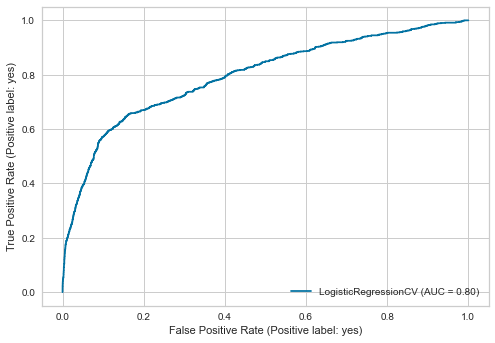

In [21]:
lr_roc = plot_roc_curve(lr, X_test, y_test)

Confusion matrix, without normalization
[[6369  925]
 [ 371  573]]
Normalized confusion matrix
[[0.87318344 0.12681656]
 [0.39300847 0.60699153]]


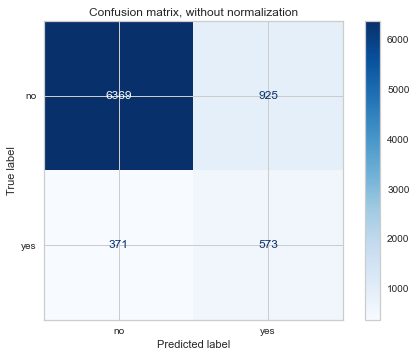

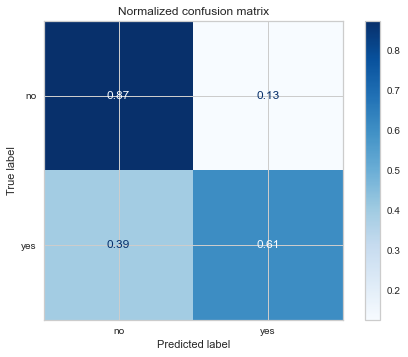

In [22]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


FP 39% FN 61% AUC 80%

# SVM 

A support vector machine is a machine learning model that is able to generalise between two different classes if the set of labelled data is provided in the training set to the algorithm. The main function of the SVM is to check for that hyperplane that is able to distinguish between the two classes.[1]

In [23]:
# pipeline combining transformers and estimator
pipe_svm= make_pipeline(StandardScaler(), SVC(random_state=1))

# grid searh to choose the best (combination of) hyperparameters
r=[0.1,1,10]
pg_svm=[ {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]

gs_svm=GridSearchCV(estimator= pipe_svm,
               param_grid= pg_svm,
               scoring='accuracy',
               cv=5)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_svm_scores = cross_val_score(gs_svm, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_svm.fit(X_train, y_train)
gs_svm_best=gs_svm.best_estimator_
gs_svm_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_svm.score(X_train, y_train)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_svm.score(X_test, y_test)*100))

Train Accuracy:   92.5%
Test Accuracy:    68.4%


In [24]:
#confusion_matrix and classification report
ypreds=gs_svm_best.predict(X_test)
print(confusion_matrix(y_test,ypreds))
print(classification_report(y_test,ypreds))



[[4964 2330]
 [ 274  670]]
              precision    recall  f1-score   support

          no       0.95      0.68      0.79      7294
         yes       0.22      0.71      0.34       944

    accuracy                           0.68      8238
   macro avg       0.59      0.70      0.57      8238
weighted avg       0.86      0.68      0.74      8238



Confusion matrix, without normalization
[[4964 2330]
 [ 274  670]]
Normalized confusion matrix
[[0.68055936 0.31944064]
 [0.29025424 0.70974576]]


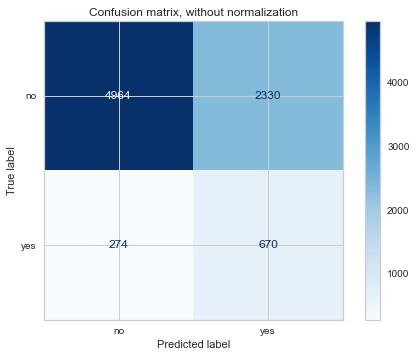

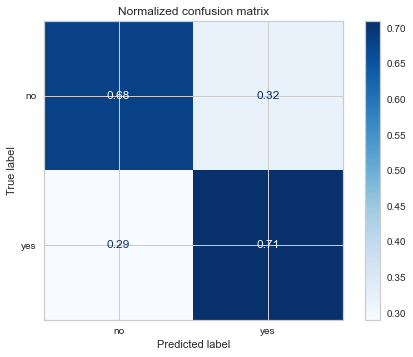

In [25]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gs_svm, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


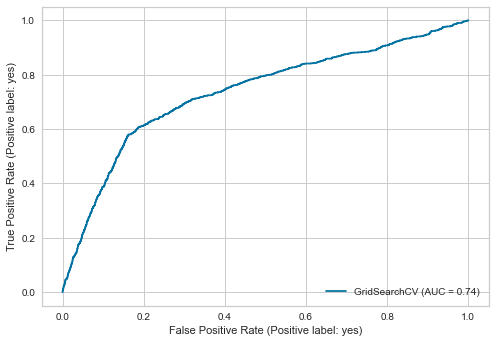

In [26]:
#ROC plot 
svm_plot = plot_roc_curve(gs_svm, X_test, y_test)

FP=29%,FN=32%,AUC=74%

# Random Forest

In [38]:
rf= RandomForestClassifier(random_state=1)

# grid searh to choose the best (combination of) hyperparameters
pg_rf={'n_estimators': [100,400,600],'max_depth': [10,20,40,50,60], 'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]}

gs_rf=GridSearchCV(estimator= rf,
               param_grid= pg_rf,
               scoring='accuracy',
               cv=4)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_rf_scores = cross_val_score(gs_rf, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_rf.fit(X_train, y_train)
gs_rf_best=gs_rf.best_estimator_
gs_rf_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_rf.score(X_train, y_train)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_rf.score(X_test, y_test)*100))

Train Accuracy:   75.0%
Test Accuracy:    84.6%


In [39]:
#confusion_matrix and classification report
ypreds=gs_rf_best.predict(X_test)
print(confusion_matrix(y_test,ypreds))
print(classification_report(y_test,ypreds))



[[6373  921]
 [ 349  595]]
              precision    recall  f1-score   support

          no       0.95      0.87      0.91      7294
         yes       0.39      0.63      0.48       944

    accuracy                           0.85      8238
   macro avg       0.67      0.75      0.70      8238
weighted avg       0.88      0.85      0.86      8238



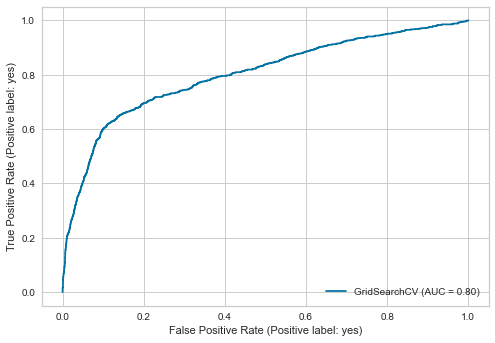

In [40]:
rf_roc = plot_roc_curve(gs_rf, X_test, y_test)

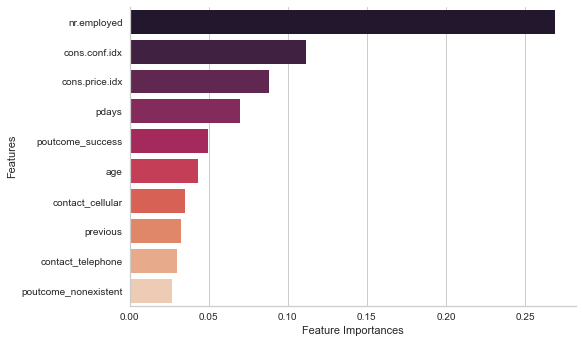

In [41]:
# using random forest to get feature importances
importances= gs_rf_best.feature_importances_
feature_importances= pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10], palette="rocket")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

It looks like age plays the biggest factor in addition with how many employees are there to make the calls. 

Confusion matrix, without normalization
[[6373  921]
 [ 349  595]]
Normalized confusion matrix
[[0.87373183 0.12626817]
 [0.36970339 0.63029661]]


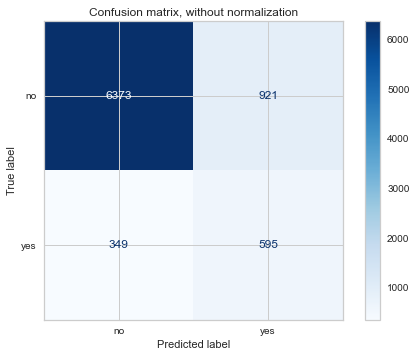

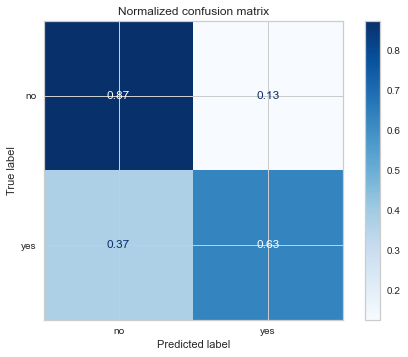

In [42]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gs_rf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [ ]:
FP=,FN=,AUC =

Age seems to be the biggest factor,but that is no surprise because the younger they can get a client, the longer they can do business with them over the course of their life.Volume is another factor, because we can see how important the number of employees to carry through the campaign is.That means to say that any decrease in the workforce would have negative effects to the marketing campaign. 

# Gradient Boosting 


In [32]:
# estimator
xb= xgb.XGBClassifier(random_state=1)

# grid searh to choose the best (combination of) hyperparameters
pg_xb={'n_estimators':[200,400,600], 'max_depth':[10,40,50,80]}

gs_xb=GridSearchCV(estimator= xb,
               param_grid= pg_xb,
               scoring='accuracy',
               cv=4)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_xb_scores = cross_val_score(gs_xb, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_xb.fit(X_train, y_train)
gs_xb_best=gs_xb.best_estimator_
gs_xb_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_xb.score(X_train, y_train)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_xb.score(X_test, y_test)*100))


Train Accuracy:   99.6%
Test Accuracy:    72.3%


In [33]:
# using random forest results: confusion_matrix and classification report
ypreds=gs_xb_best.predict(X_test)
print(confusion_matrix(y_test,ypreds))
print(classification_report(y_test,ypreds))


[[5337 1957]
 [ 321  623]]
              precision    recall  f1-score   support

          no       0.94      0.73      0.82      7294
         yes       0.24      0.66      0.35       944

    accuracy                           0.72      8238
   macro avg       0.59      0.70      0.59      8238
weighted avg       0.86      0.72      0.77      8238



Confusion matrix, without normalization
[[5337 1957]
 [ 321  623]]
Normalized confusion matrix
[[0.73169729 0.26830271]
 [0.34004237 0.65995763]]


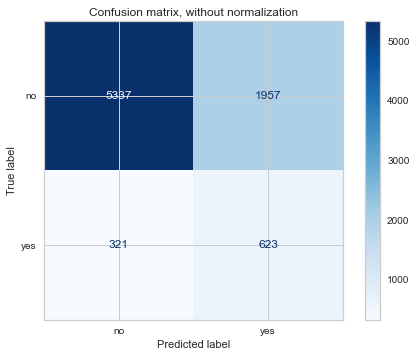

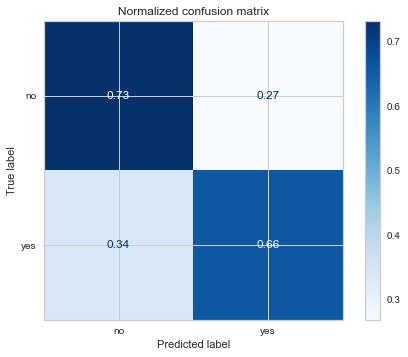

In [34]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gs_xb, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

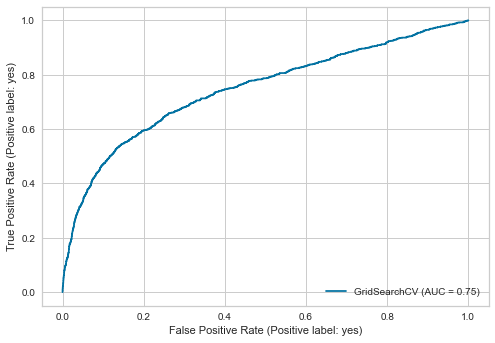

In [35]:
gb_roc = plot_roc_curve(gs_xb, X_test, y_test)

FP=34%,FN=27%,AUC = 75%

the model we choose will be __ because the test accuracy is the highest as well as the fp rate being the best `

Reference #1  https://www.analyticssteps.com/blogs/how-does-support-vector-machine-algorithm-works-machine-learning 

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/